In [37]:
%cd '/content/drive/MyDrive/Prediction-of-obesity-risk'

/content/drive/MyDrive/Prediction-of-obesity-risk


# Importing Libraries

In [38]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.option_context('mode.use_inf_as_na', True)
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, f1_score, classification_report

plt.style.use('seaborn-v0_8-darkgrid')

# Loading Dataset

In [39]:
# Loading csv to panda dataframe
df = pd.read_csv('ObesityDataSet.csv')
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


# Exploratory Data Analysis

## Basic Data Exploration

In [40]:
# Checking dataset shape
df.shape

(2111, 17)

- There are 2111 rows and 17 columns

In [41]:
# Checking column types
df.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

- There 8 columns with Float64 and 9 columns with Object types.

In [42]:
# Stat of numerical values
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [43]:
# Checking number of null values
df.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

- There is not any missing values

In [44]:
# Total duplicate rows
df.duplicated().sum()

24

- There are 24 duplicate values

In [45]:
# Print duplicated entries
df[df.duplicated]

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
98,Female,21.0,1.52,42.0,no,no,3.0,1.0,Frequently,no,1.0,no,0.0,0.0,Sometimes,Public_Transportation,Insufficient_Weight
106,Female,25.0,1.57,55.0,no,yes,2.0,1.0,Sometimes,no,2.0,no,2.0,0.0,Sometimes,Public_Transportation,Normal_Weight
174,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
179,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
184,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
209,Female,22.0,1.69,65.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Sometimes,Public_Transportation,Normal_Weight
309,Female,16.0,1.66,58.0,no,no,2.0,1.0,Sometimes,no,1.0,no,0.0,1.0,no,Walking,Normal_Weight
460,Female,18.0,1.62,55.0,yes,yes,2.0,3.0,Frequently,no,1.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight
467,Male,22.0,1.74,75.0,yes,yes,3.0,3.0,Frequently,no,1.0,no,1.0,0.0,no,Automobile,Normal_Weight
496,Male,18.0,1.72,53.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,2.0,Sometimes,Public_Transportation,Insufficient_Weight


In [46]:
# Drop duplicates
df.drop_duplicates(inplace=True)

- Dropped all duplicated values

In [47]:
# Making lists of numerical and categorical columns
numerical_cols = [cname for cname in df.columns if df[cname].dtype in ['int64', 'float64']]
categorical_cols = [cname for cname in df.columns if df[cname].dtype == "object"]

# Printing numerical and categorical column lists
print('Numerical Columns: ', numerical_cols)
print('Categorical Columns: ', categorical_cols)

Numerical Columns:  ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
Categorical Columns:  ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']


- Creating dataframe of categorical columns with unique values

In [48]:
# Calculate number of unique values and unique values for each categorical features
unique_counts = df[categorical_cols].nunique()
unique_values = df[categorical_cols].apply(lambda x: x.unique())

# Create new dataframe with the results
pd.DataFrame({'Number of Unique Values': unique_counts, 'Unique Values': unique_values})

,Number of Unique Values,Unique Values
Gender,2,"[Female, Male]"
family_history_with_overweight,2,"[yes, no]"
FAVC,2,"[no, yes]"
CAEC,4,"[Sometimes, Frequently, Always, no]"
SMOKE,2,"[no, yes]"
SCC,2,"[no, yes]"
CALC,4,"[no, Sometimes, Frequently, Always]"
MTRANS,5,"[Public_Transportation, Walking, Automobile, M..."
NObeyesdad,7,"[Normal_Weight, Overweight_Level_I, Overweight..."


- Obesity level (NObeyesdad) is our target variable

In [49]:
# Value counts for each NObeyesdad types
NObeyesdadVC = df.NObeyesdad.value_counts()
NObeyesdadVC

Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_II    290
Normal_Weight          282
Overweight_Level_I     276
Insufficient_Weight    267
Name: NObeyesdad, dtype: int64

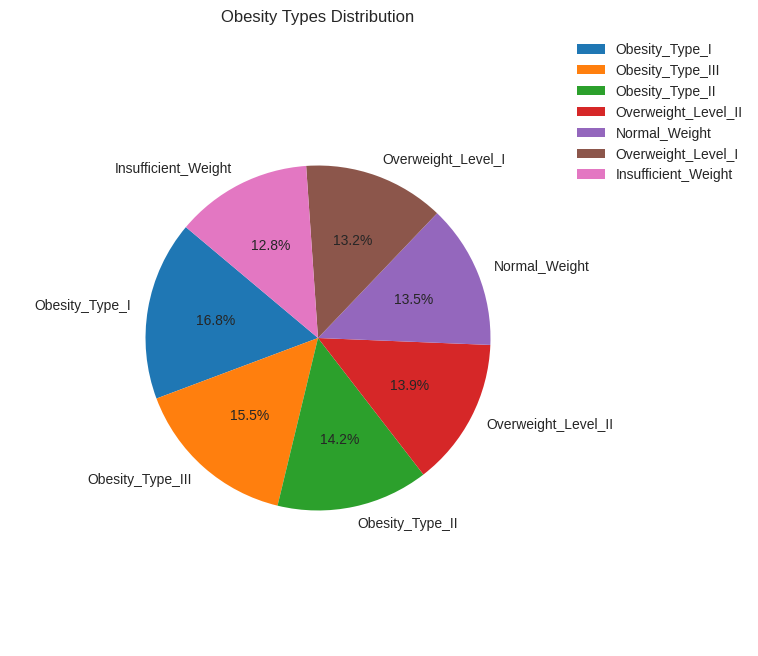

In [50]:
# Storing labels and sizes into variables
labels = NObeyesdadVC.index.tolist()
sizes = NObeyesdadVC.values.tolist()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, radius=0.7)

# Add legend
plt.legend(loc='upper left', bbox_to_anchor=(0.9, 1))

# Set title
plt.title('Obesity Types Distribution')

# Show plot
plt.show()

- We could say the dataset is fairly balanced.

## Univariate Analysis

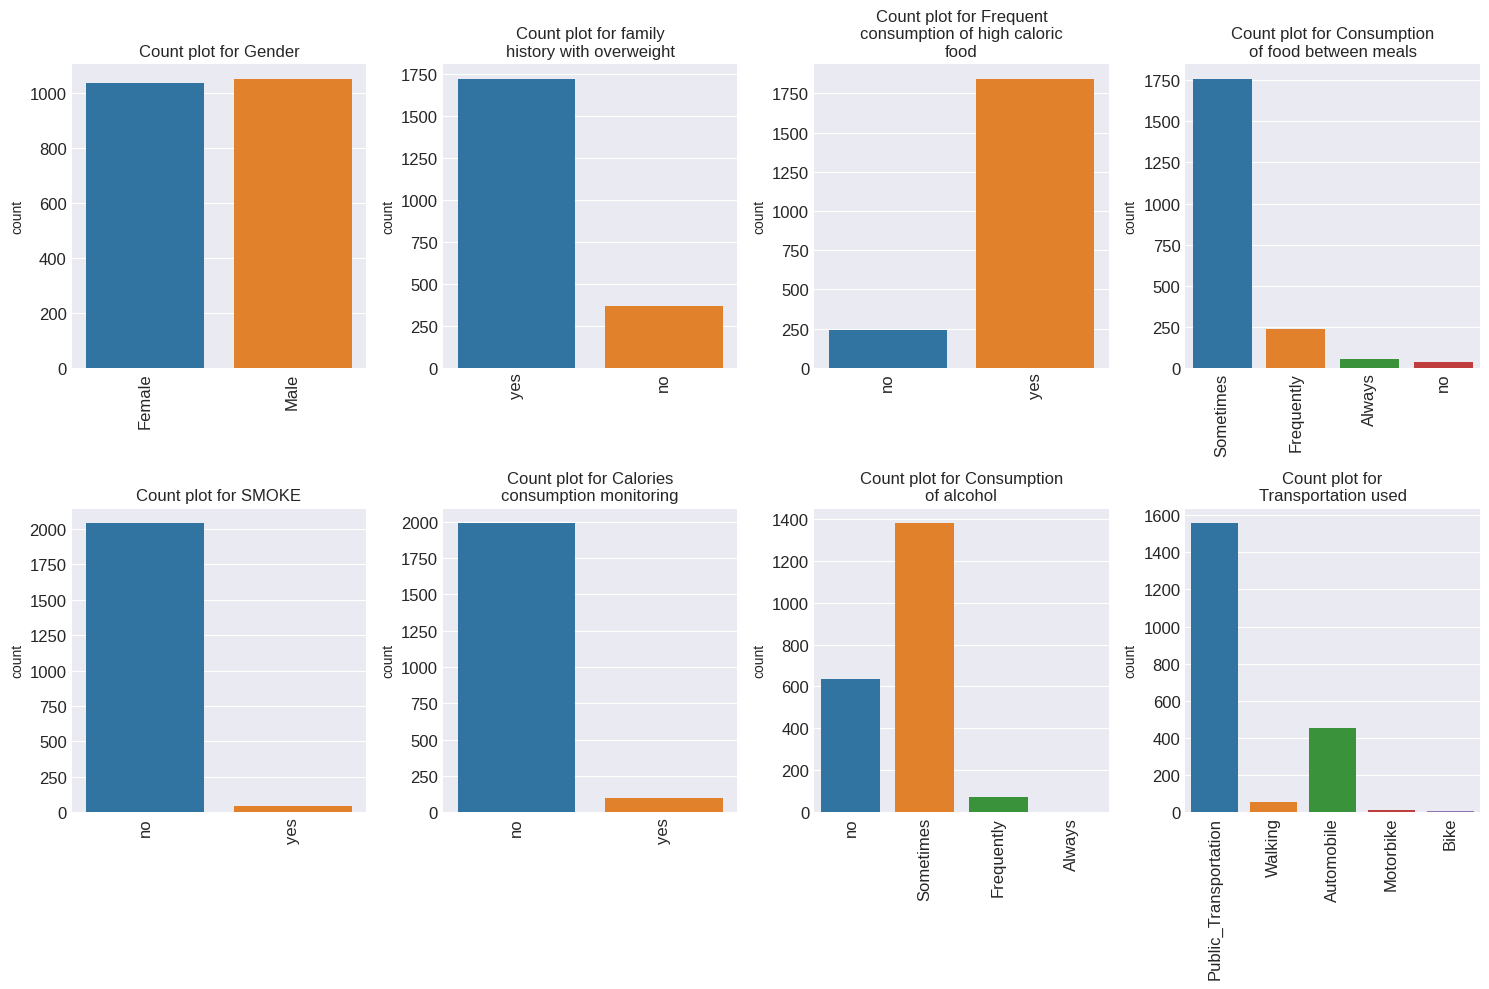

In [51]:
# Create a figure and subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 10))

# Flatten the axes array
axes = axes.flatten()

# Column description
num_columns_desc = ['Gender', 'family history with overweight', 'Frequent consumption of high caloric food', 'Consumption of food between meals', 'SMOKE', 'Calories consumption monitoring',
                'Consumption of alcohol', 'Transportation used']

# Plot count plots for each column
for i, column in enumerate(df[categorical_cols].drop(columns=['NObeyesdad']).columns):
    sns.countplot(x=column, data=df, ax=axes[i], hue=column)
    wrapped_title = '\n'.join(textwrap.wrap(f'Count plot for {num_columns_desc[i]}', width=27))
    axes[i].set_title(wrapped_title)
    axes[i].title.set_size(12)
    axes[i].tick_params(axis='x', labelrotation=90)  # Set y-axis labels rotation angle
    axes[i].tick_params(axis='both', which='major', labelsize=12)  # Set tick label font size
    axes[i].set_xlabel('')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

***Key Observations***
- Most people have family history with overweight.
- Most people take high caloric food frequently.
- Majority said 'sometimes' they take food between meals.
- Most people have family history with overweight.
- Almost none of respondents are smoker and monitor calories consumption.
- Majority of the respondents sometimes take alcohol.
- Public transportation is most used, followed by Automobiles.

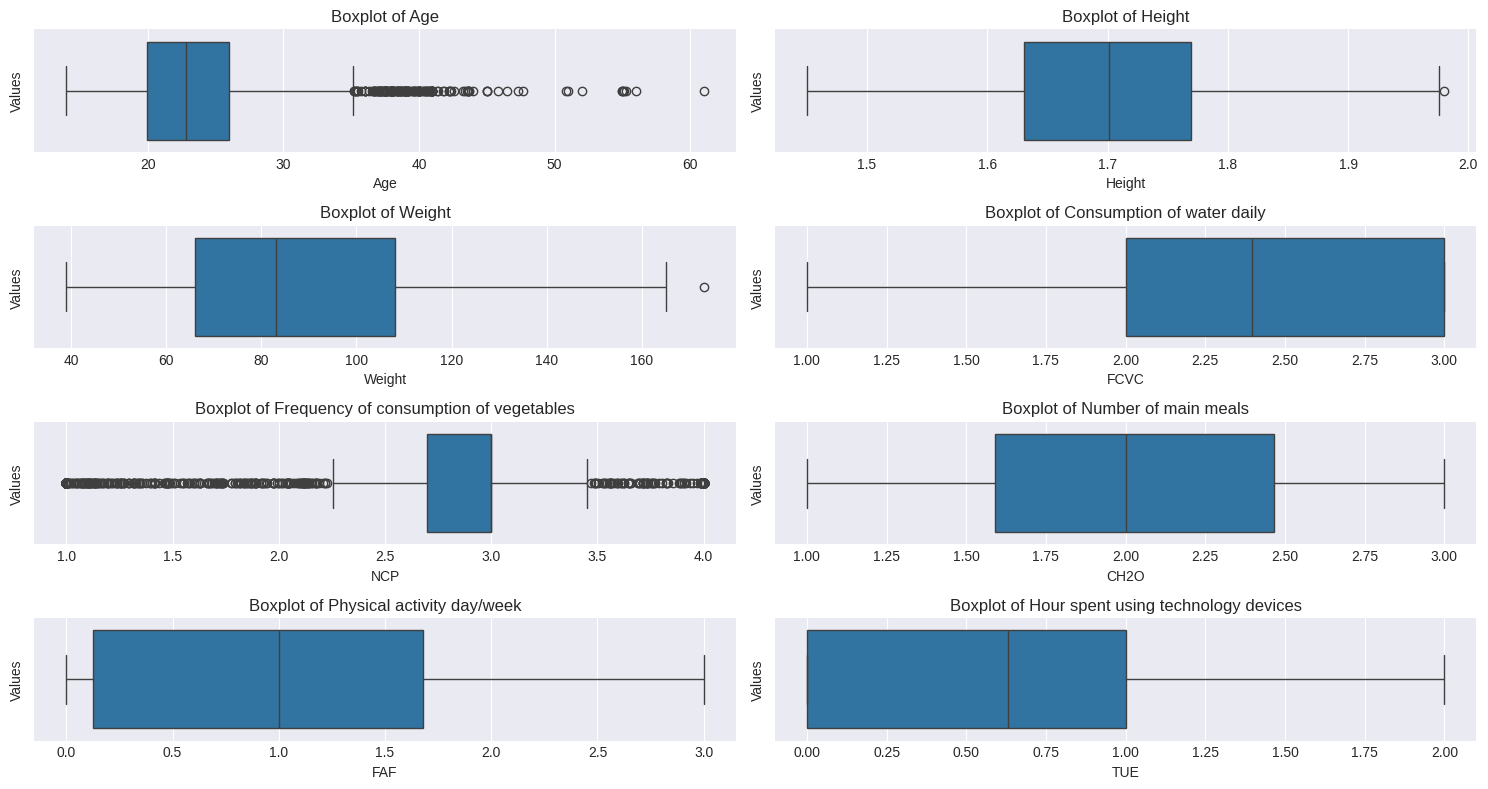

In [52]:
# Create a figure and subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 2*4))

# Flatten the axes array
axes = axes.flatten()

# Column description
columns_desc = ['Age', 'Height', 'Weight', 'Consumption of water daily', 'Frequency of consumption of vegetables', 'Number of main meals',
                'Physical activity day/week', 'Hour spent using technology devices']

# Actual units of numerical columns
labels = ['years', 'meter', 'kilograms', 'litre', 'Frequency', 'Number',
                'day/week', 'Hours/day']

# Boxplot for each column
for i, column in enumerate(df[numerical_cols].columns):
    sns.boxplot(x=df[column], ax=axes[i])
    axes[i].set_title(f'Boxplot of {columns_desc[i]}')
    axes[i].set_ylabel('Values')


# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

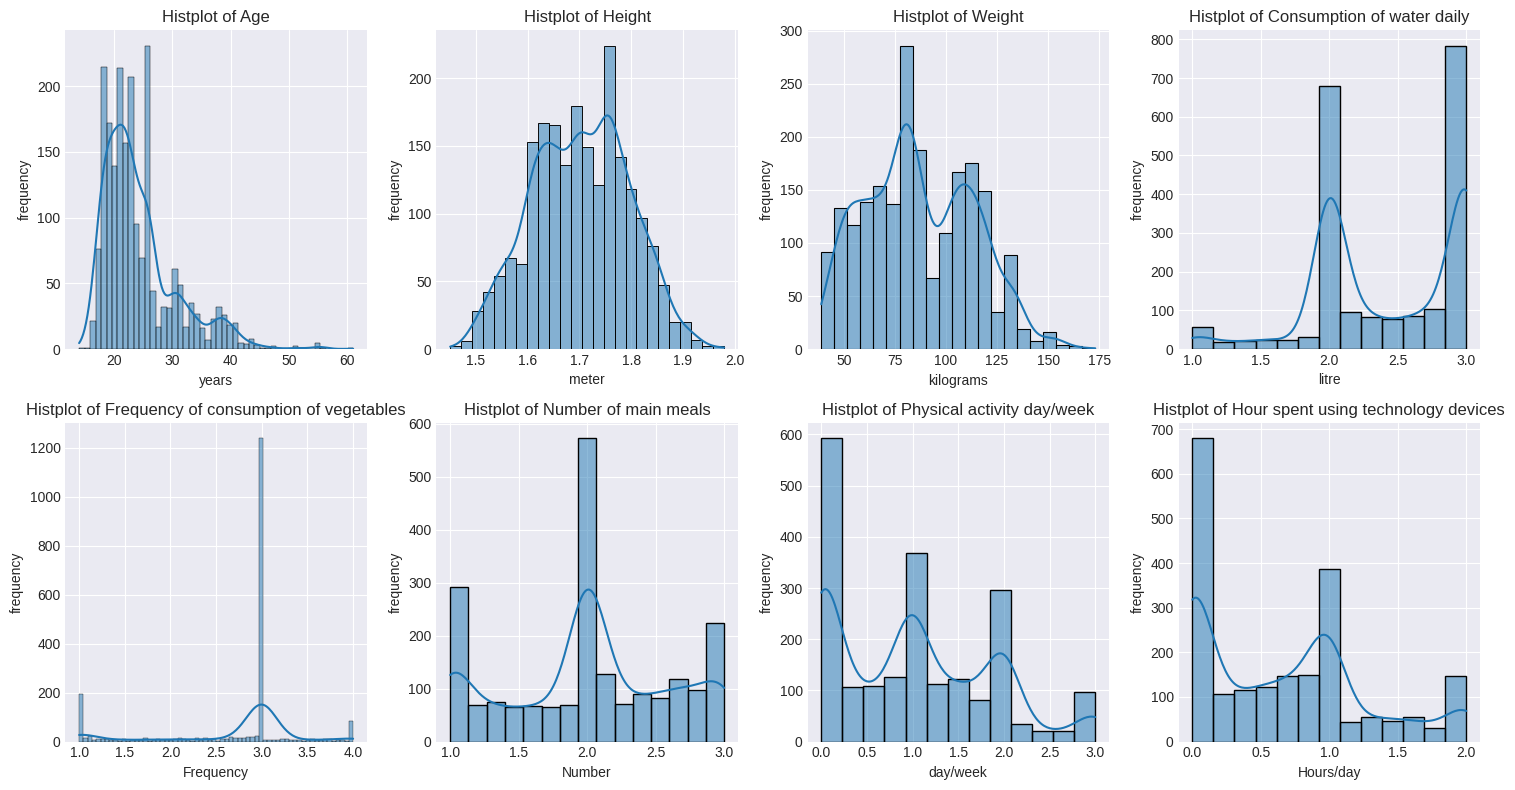

In [53]:
# Create a figure and subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 4*2))

# Flatten the axes array
axes = axes.flatten()

# Actual units of numerical columns
labels = ['years', 'meter', 'kilograms', 'litre', 'Frequency', 'Number',
                'day/week', 'Hours/day']

for i, column in enumerate(df[numerical_cols].columns):
    sns.histplot(data=df, x=column, kde=True, ax=axes[i])
    axes[i].set_title(f'Histplot of {columns_desc[i]}')
    axes[i].title.set_size(12)
    axes[i].set_xlabel(labels[i])
    axes[i].set_ylabel('frequency')


# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

## Bivariate Analysis

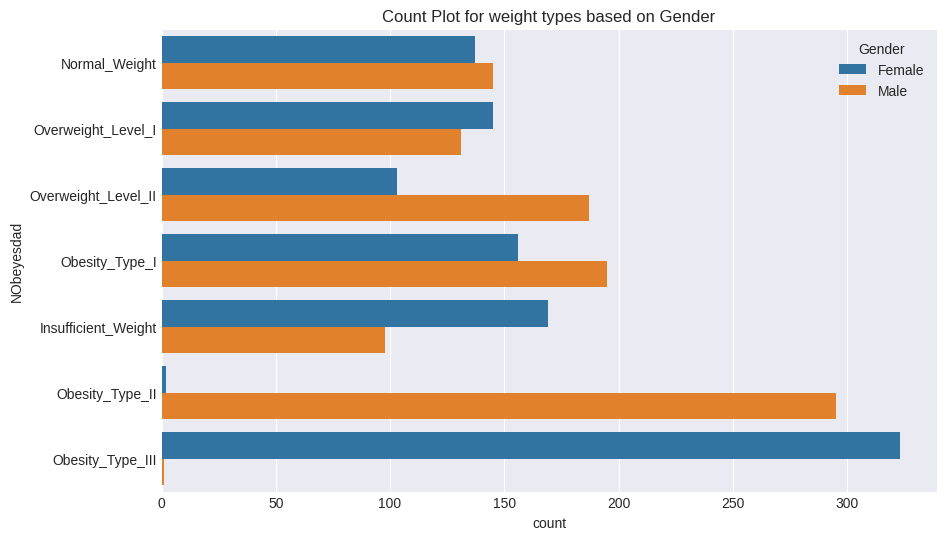

In [54]:
# Count plot
plt.figure(figsize=(10, 6))
plt.title('Count Plot for weight types based on Gender')
sns.countplot(y='NObeyesdad', data=df, hue='Gender')
plt.show()

***Key Observations***
- More female with insufficient weight than male.
- Almost all Obesity type 2 repondants are male and all Obesity types 3 are females.
- More than 350 female respondants are fall into the 'Obesity type 3'.

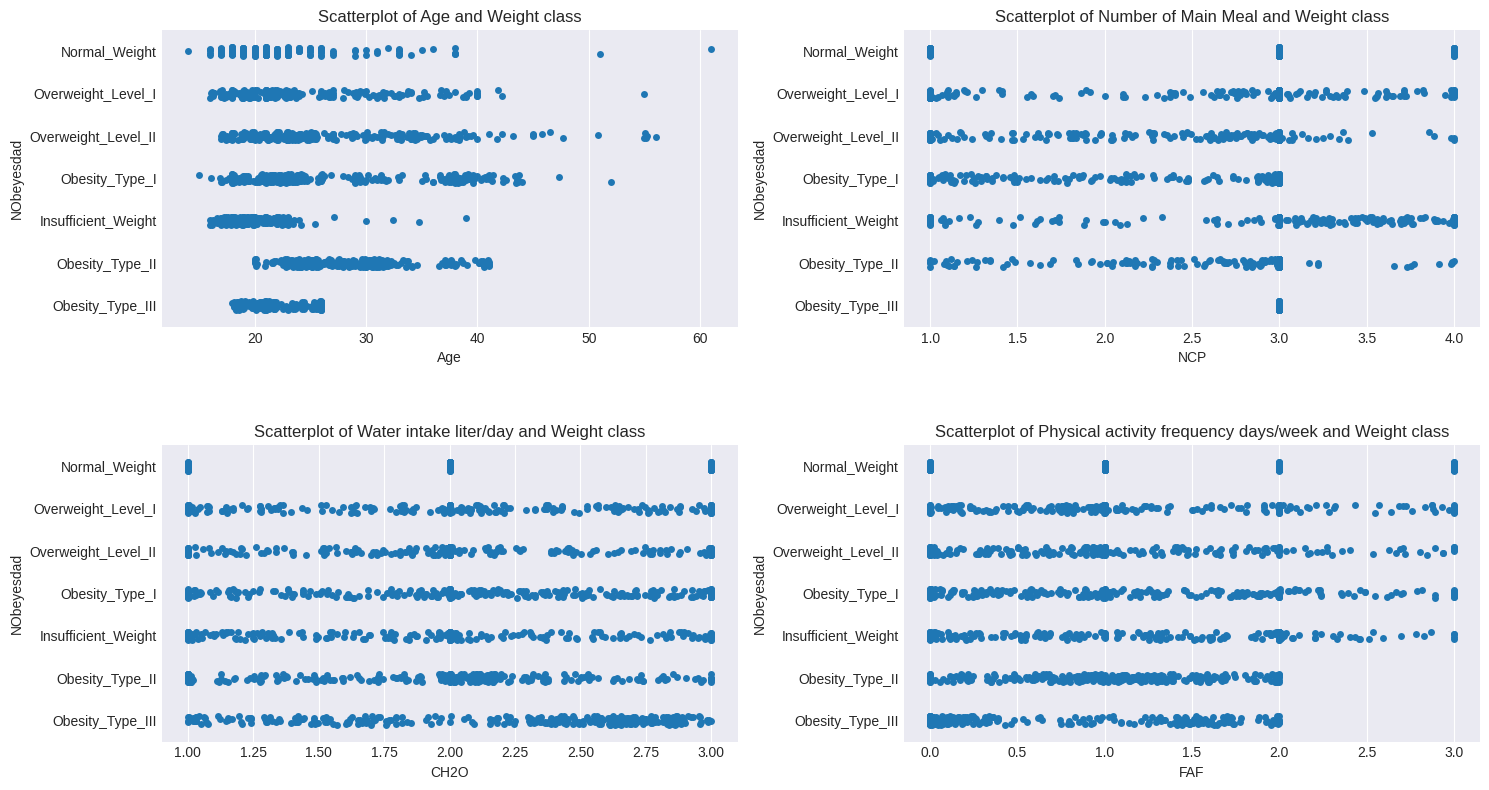

In [55]:
# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 4*2))

# Flatten the axes array
axes = axes.flatten()

# Plot on the first subplot
sns.stripplot(data=df, ax=axes[0], x='Age', y='NObeyesdad')
sns.stripplot(data=df, ax=axes[1], x='NCP', y='NObeyesdad')
sns.stripplot(data=df, ax=axes[2], x='CH2O', y='NObeyesdad')
sns.stripplot(data=df, ax=axes[3], x='FAF', y='NObeyesdad')

# Title for each subplots
axes[0].set_title('Scatterplot of Age and Weight class')
axes[1].set_title('Scatterplot of Number of Main Meal and Weight class')
axes[2].set_title('Scatterplot of Water intake liter/day and Weight class')
axes[3].set_title('Scatterplot of Physical activity frequency days/week and Weight class')

# Adjust layout to prevent overlapping and give padding between subplots
plt.tight_layout()
plt.subplots_adjust(hspace=0.4)  # Adjust the vertical spacing between subplots

# Show the plot
plt.show()

***For Context***

How often do you have physical activity?
- 0 - I do not have
- 1 - 1 or 2 days
- 2 - 2 or 4 days
- 3 - 4 or 5 days

***Key Observations***
- All 'Obesity type 3' repondant's age less than 30.
- All 'Obesity type 3' repondant's age less than 40.
- A significant number of underweight respondants are very young and take more than 3 main meal a day.
- On the other hand, almost all obese type 1 and 2 respondants take less than 3 main meals.
- All obese type 1 and 2 respondants spends less that 2 or 4 days a week doing physical activities.

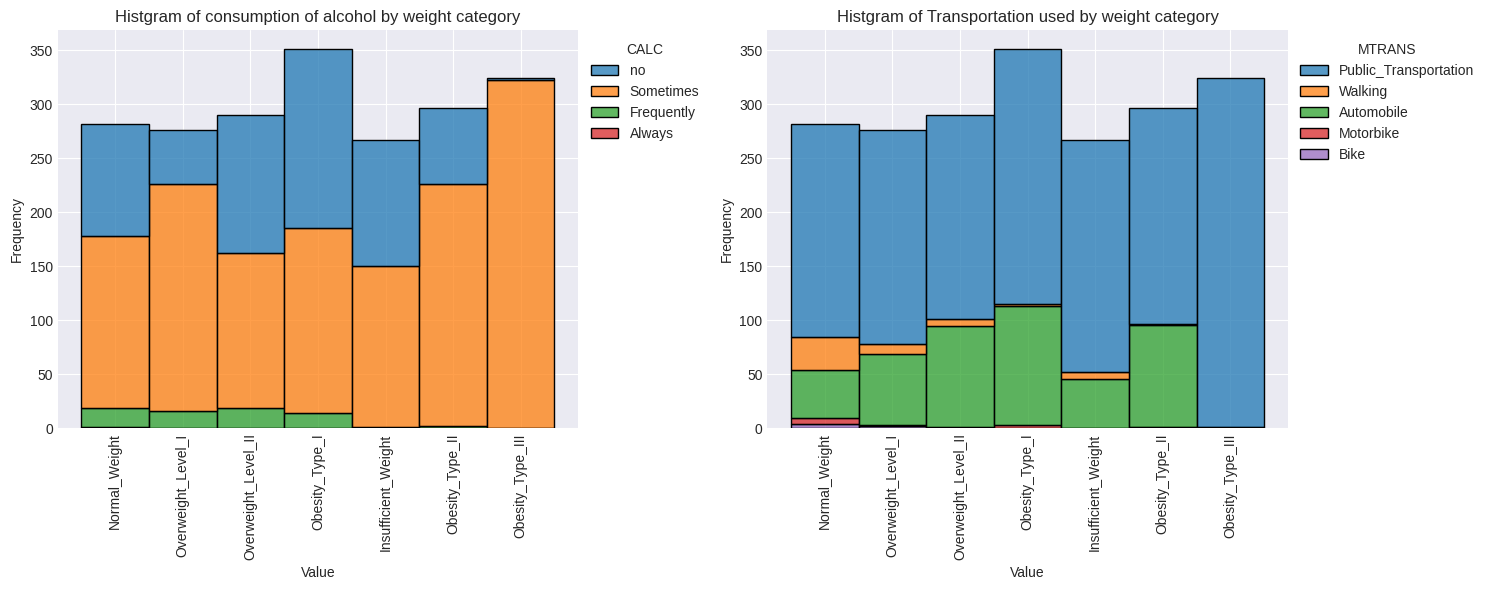

In [56]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot histograms
sns.histplot(data=df, ax=axes[0], x='NObeyesdad', hue='CALC', legend=True,  multiple='stack')
sns.histplot(data=df, ax=axes[1], x='NObeyesdad', hue='MTRANS', legend=True, multiple='stack')


# Add labels and legends
for ax in axes:
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    ax.tick_params(axis='x', labelrotation=90)
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

# Add Titles
axes[0].set_title('Histgram of consumption of alcohol by weight category')
axes[1].set_title('Histgram of Transportation used by weight category')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


***Key Observation***
- Alcohol consumption 'sometimes' is the most common answer.
- There are no frequent drinkers in the underweight, Obesity Type 2 and 3 categories.
- There are more sober people in the obesity type 1 category than the rest.
- All obese type 3 respondents use public transportation.

## Multivariate Analysis

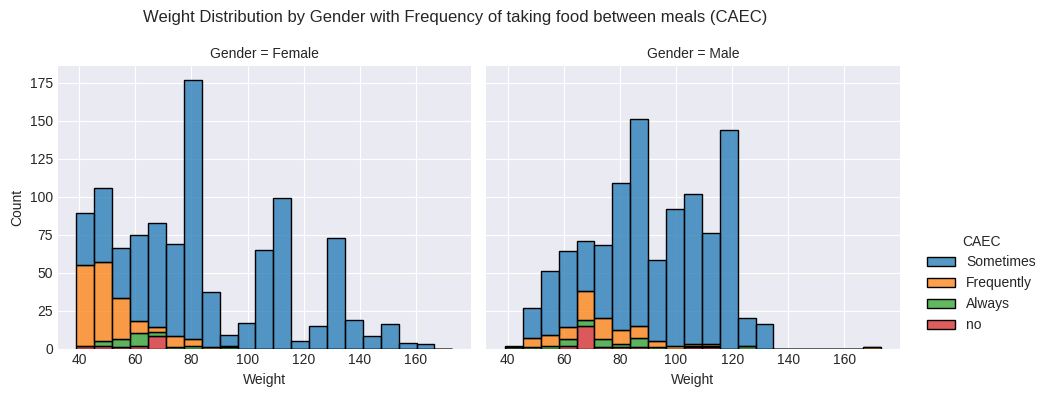

In [57]:
# Plot figure level distribution
g = sns.displot(
    df,
    x="Weight", hue="CAEC", multiple="stack",
    col="Gender", height=4,
)

# Place lengend
sns.move_legend(g, "upper left", bbox_to_anchor=(1, .45))

# Add a title to the entire plot
plt.suptitle('Weight Distribution by Gender with Frequency of taking food between meals (CAEC)', fontsize=12)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

***Key Observation***
- 'Sometimes' is the most common answer.
- More females take food between meals 'frequently' than males, all weighing less than 100 kg.

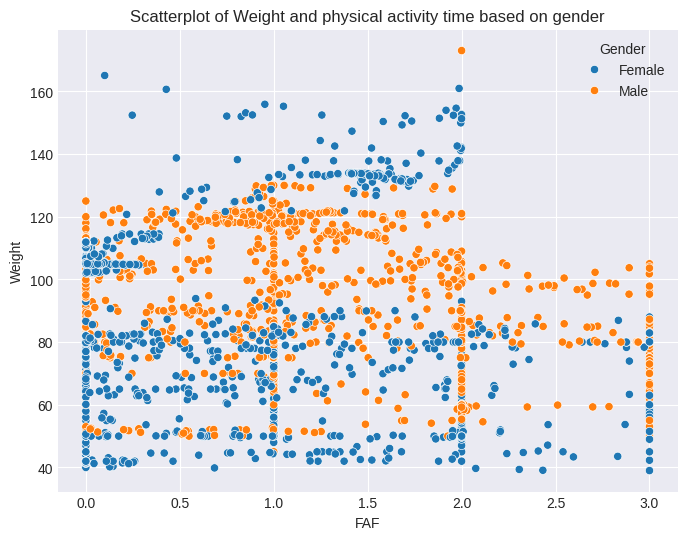

In [58]:
# Create plot
plt.figure(figsize=(8, 6))

# Scatterplot of weight and physical activity time
sns.scatterplot(data=df, y='Weight', x='FAF', hue="Gender")

# Add Title
plt.title('Scatterplot of Weight and physical activity time based on gender')

# Show plot
plt.show()

**How often do you have physical activity?**
- 0 = I do not have
- 1 = 1 or 2 days
- 2 = 2 or 4 days
- 3 = 4 or 5 days

***Key Observation***
- Respondents who spend more than 2/4 days a week weigh less than 100kg.
- A good portion of both genders spend 1/2 or 2/4 days per week, and some of the overweight and obese people are also in the category.

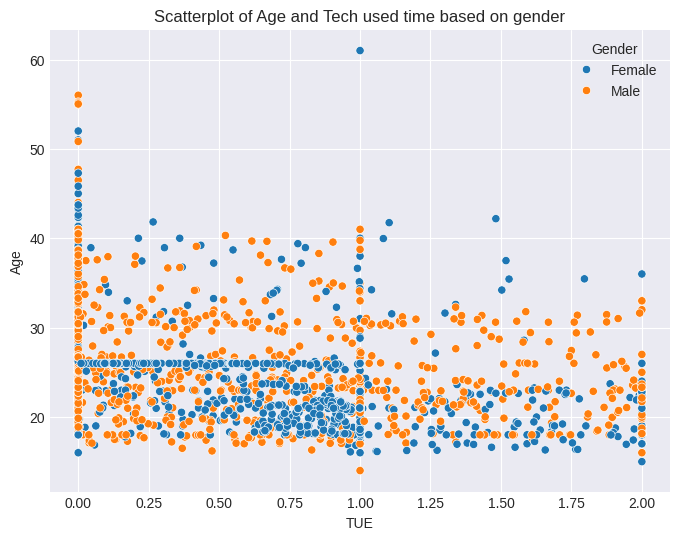

In [59]:
# Create plot
plt.figure(figsize=(8, 6))

# Scatterplot of Age and Tech used time
sns.scatterplot(data=df, y='Age', x='TUE', hue="Gender")

# Add Title
plt.title('Scatterplot of Age and Tech used time based on gender')

# Show plot
plt.show()

**How much time do you use technological devices such as cell phone, videogames, television, computer and others?**
- 0 = 0–2 hours
- 1 = 3–5 hours
- 2 = More than 5 hours

***Key Observation***
- Respondents who spend more than 5 hours daily are less than 35 years old, and most are men.
- Respondents who spend 3-5 hours daily are less than 40 years old.
- More men spend 0-2 hours a day than women; in this category, most men are younger than women.

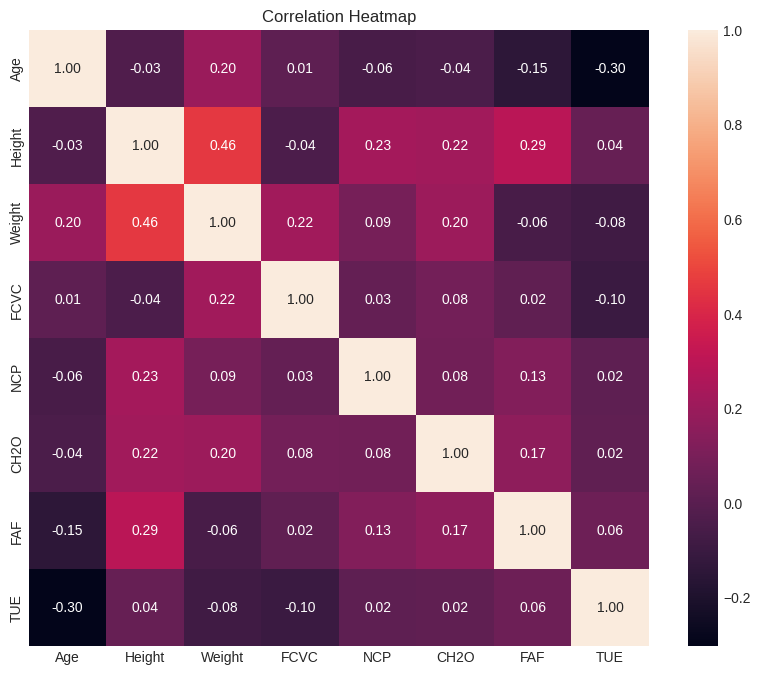

In [60]:
# Create a heatmap
corr = df.corr(method='pearson', numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()

***Key observation***
- Height and weight are positively correlated.
- Age and Tech used time are highly negatively correlated.